In [1]:
import gdown
import zipfile
import os

# Download the dataset from Google Drive
url = 'https://drive.google.com/uc?id=1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX'
output = '/content/dataset.zip'
gdown.download(url, output, quiet=False)

# Unzip the dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Path to the dataset folder
image_folder = '/content/dataset'

# Rename files to remove " - Copy" while keeping duplicates
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if ' - Copy' in file:
            new_file_name = file.replace(' - Copy', '').strip()
            old_file_path = os.path.join(root, file)
            new_file_path = os.path.join(root, new_file_name)
            if not os.path.exists(new_file_path):
                # Rename if the new file path does not exist
                os.rename(old_file_path, new_file_path)
                print(f"Renamed: {old_file_path} -> {new_file_path}")
            else:
                # If the file already exists, create a new name for the duplicate
                base, ext = os.path.splitext(new_file_name)
                counter = 1
                while os.path.exists(new_file_path):
                    new_file_path = os.path.join(root, f"{base}_{counter}{ext}")
                    counter += 1
                os.rename(old_file_path, new_file_path)
                print(f"Renamed and renamed duplicate: {old_file_path} -> {new_file_path}")

# Confirm the final list of files
print("Final list of files:")
for root, dirs, files in os.walk(image_folder):
    for file in files:
        print(os.path.join(root, file))


Downloading...
From (original): https://drive.google.com/uc?id=1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX
From (redirected): https://drive.google.com/uc?id=1wHbHZY6m5guxde1ze-IedjY6eMqiwzOX&confirm=t&uuid=64235c7d-b2f1-43b9-99c1-765f6d93ab50
To: /content/dataset.zip
100%|██████████| 1.45G/1.45G [00:41<00:00, 34.7MB/s]


Streaming output truncated to the last 5000 lines.
/content/dataset/FAE_D1_collated - use/50_0_1_1_1.jpg
/content/dataset/FAE_D1_collated - use/50_0_1_46.jpg
/content/dataset/FAE_D1_collated - use/30_0_4_48.jpg
/content/dataset/FAE_D1_collated - use/31_1_6_11.jpg
/content/dataset/FAE_D1_collated - use/19_1_5_21.png
/content/dataset/FAE_D1_collated - use/41_1_5_37.jpg
/content/dataset/FAE_D1_collated - use/42_0_1_19_1.png
/content/dataset/FAE_D1_collated - use/58_1_6_12.jpg
/content/dataset/FAE_D1_collated - use/41_0_6_2_1.jpg
/content/dataset/FAE_D1_collated - use/40_1_6_5_1.jpg
/content/dataset/FAE_D1_collated - use/24_1_5_100_1.jpg
/content/dataset/FAE_D1_collated - use/35_0_5_34.jpg
/content/dataset/FAE_D1_collated - use/23_1_6_54.png
/content/dataset/FAE_D1_collated - use/38_0_5_23_1.png
/content/dataset/FAE_D1_collated - use/46_0_6_44_1.jpg
/content/dataset/FAE_D1_collated - use/30_1_4_5.jpg
/content/dataset/FAE_D1_collated - use/37_0_3_25_1.png
/content/dataset/FAE_D1_collated - 

In [2]:
import pandas as pd

# List all image paths and extract labels
data = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            label = file.split('_')[0]  # Extract the age label from the filename
            file_path = os.path.join(root, file)
            data.append([file_path, label])

# Create a DataFrame
df = pd.DataFrame(data, columns=['file_path', 'age'])

# Print basic information
print(df.info())
print(df['age'].value_counts().describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  30002 non-null  object
 1   age        30002 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB
None
count      81.000000
mean      370.395062
std       312.880236
min         4.000000
25%        88.000000
50%       314.000000
75%       672.000000
max      1008.000000
Name: count, dtype: float64


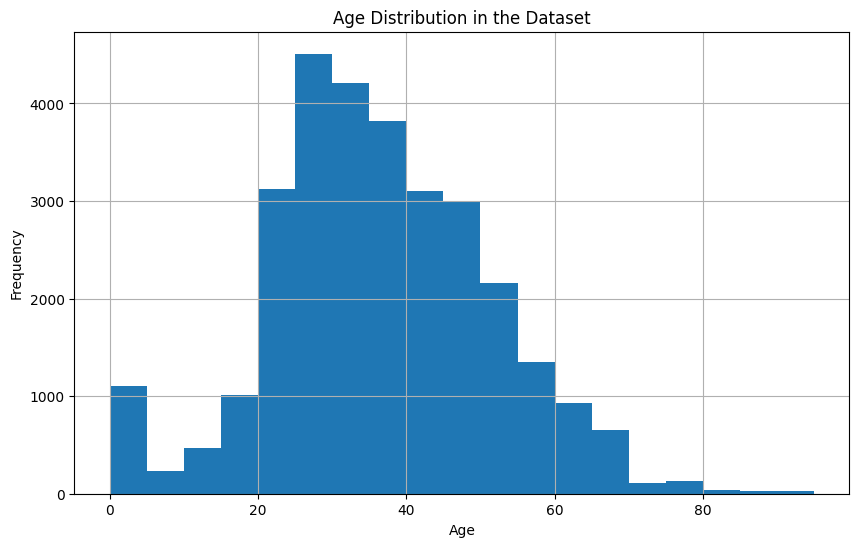

In [3]:

import matplotlib.pyplot as plt

# Plot age distribution
plt.figure(figsize=(10, 6))
df['age'].astype(int).hist(bins=range(0, 100, 5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in the Dataset')
plt.show()

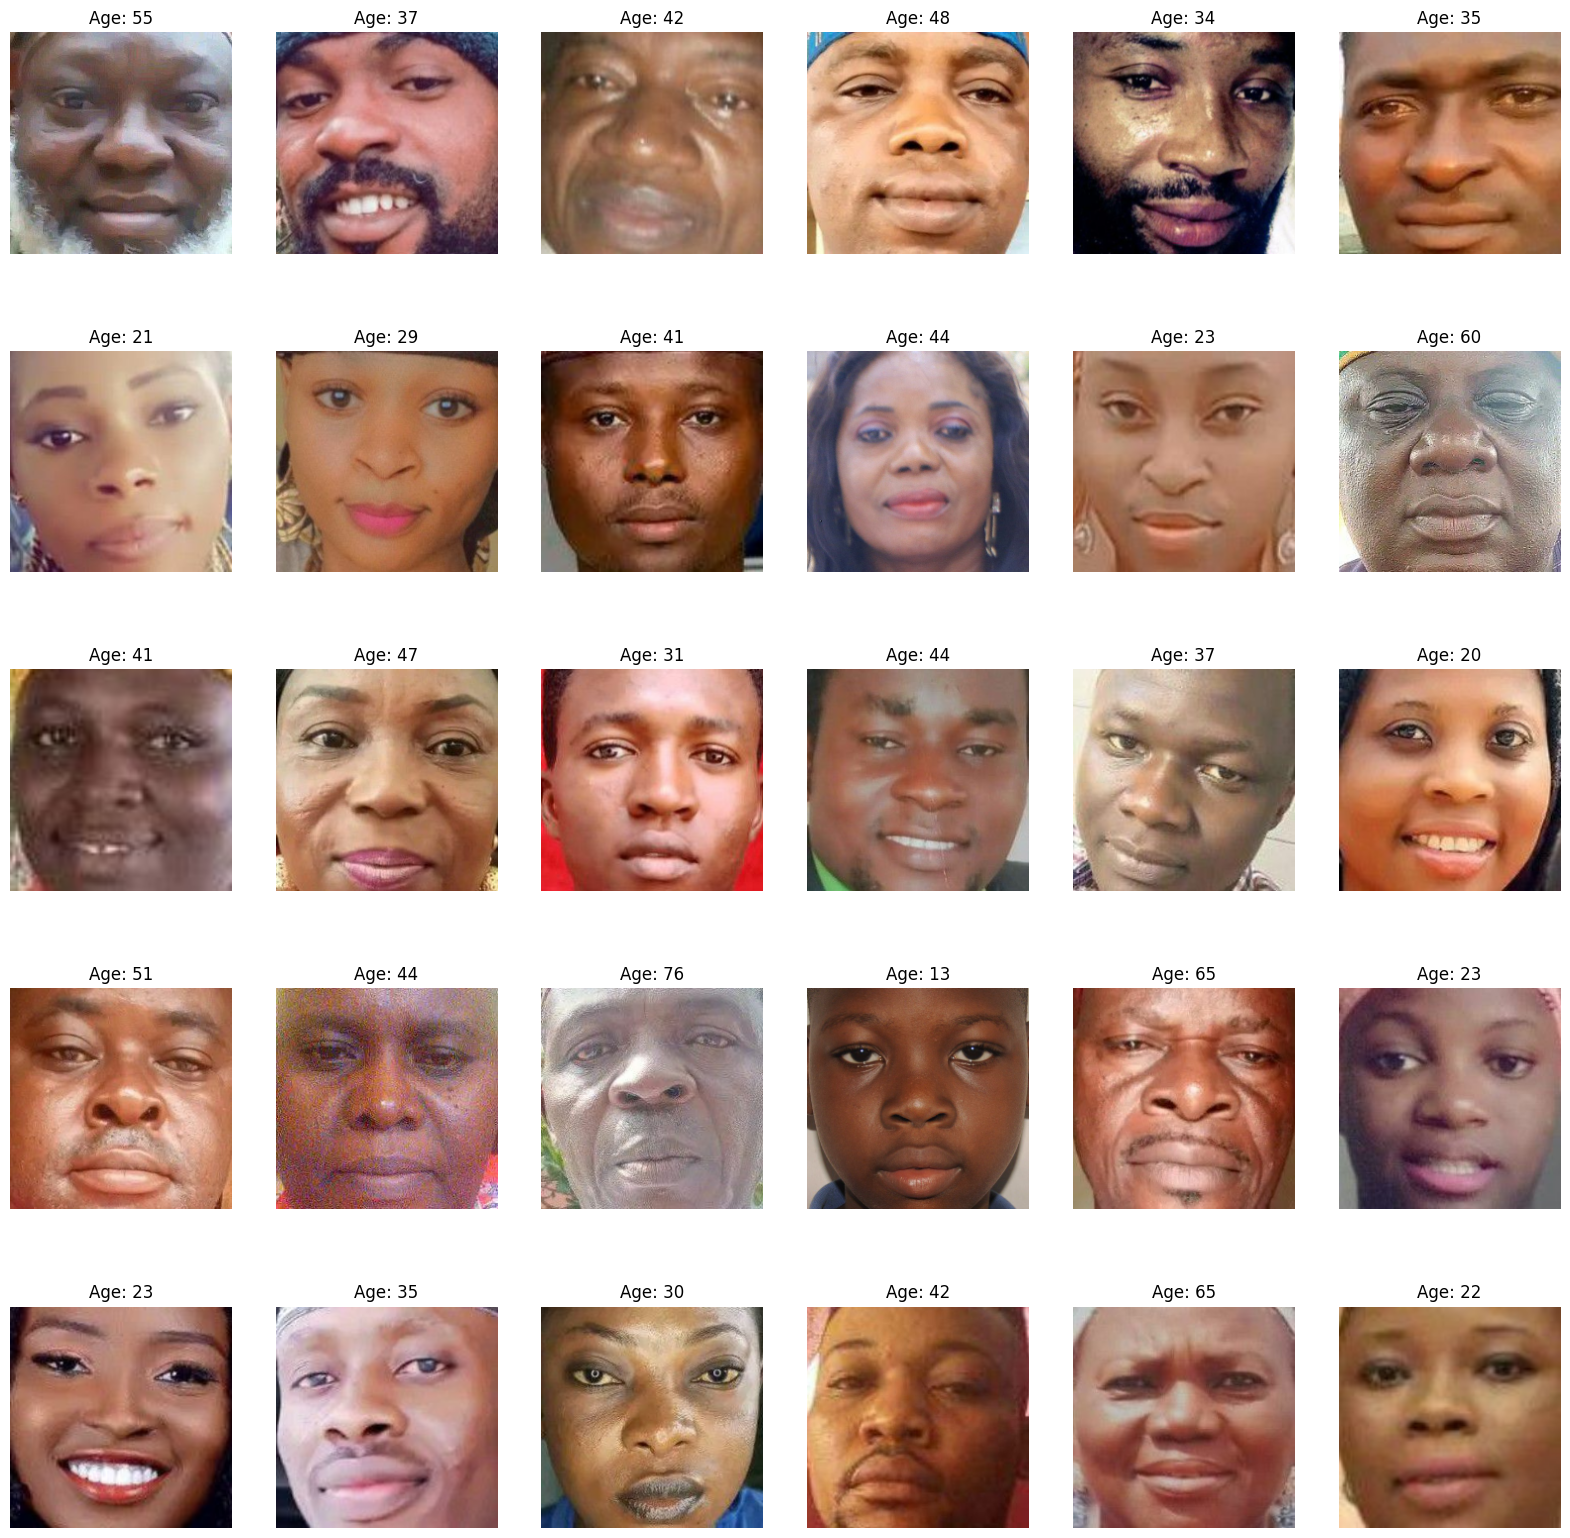

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to preprocess and load images
def preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to match ResNet50 input size
    image = (image / 255.0)  # Normalize the image
    return image, label

# Function to visualize images
def visualize_images(file_paths, labels, num_images=30):
    plt.figure(figsize=(20, 20))  # Adjust the figure size
    num_rows = 5  # Number of rows
    num_cols = 6  # Number of columns (5 x 6 = 30 images)

    for i in range(num_images):
        image_path = file_paths[i]
        label = labels[i]

        # Load and preprocess the image
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.resize(image, [224, 224])
        image = (image / 255.0)

        # Display the image in the subplot grid
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(f'Age: {label}')
        plt.axis('off')

    plt.show()

# Sample data for visualization
sample_df = df.sample(n=30)  # Choose 30 images to visualize
sample_file_paths = sample_df['file_path'].tolist()
sample_labels = sample_df['age'].tolist()

# Visualize 30 sample images
visualize_images(sample_file_paths, sample_labels, num_images=30)



In [5]:
def preprocess_image(file_path, label):
    try:
        image = tf.io.read_file(file_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.resize(image, [224, 224])  # Resize to match ResNet50 input size
        image = (image / 255.0)  # Normalize the image
        return image, label
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        # Optionally return a blank image or skip the file
        return tf.zeros([224, 224, 3]), label



missing_files = []
for file_path in df['file_path']:
    if not os.path.exists(file_path):
        missing_files.append(file_path)

if missing_files:
    print(f"Missing files: {missing_files}")
else:
    print("All files are present.")

All files are present.


In [6]:
import os

# Define valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

def preprocess_image(file_path, label):
    try:
        # Ensure file path is valid and ends with a valid image extension
        if os.path.exists(file_path) and file_path.lower().endswith(valid_extensions):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_image(image, channels=3)
            image = tf.image.resize(image, [224, 224])  # Resize to match ResNet50 input size
            image = (image / 255.0)  # Normalize the image
            return image, label
        else:
            raise ValueError(f"Invalid file or file type: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        # Return a blank image or skip the file
        return tf.zeros([224, 224, 3]), label


In [7]:



# Filter dataset to include only valid image files
valid_df = df[df['file_path'].apply(lambda x: x.lower().endswith(valid_extensions))]

print(f"Filtered dataset contains {len(valid_df)} valid image files out of {len(df)} total files.")

Filtered dataset contains 30002 valid image files out of 30002 total files.


In [8]:
def preprocess_image(file_path, label):
    try:
        print(f"Processing: {file_path}")
        if os.path.exists(file_path) and file_path.lower().endswith(valid_extensions):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_image(image, channels=3)

            if image.shape.rank is None:
                raise ValueError(f"Invalid image shape for {file_path}")

            image = tf.image.resize(image, [224, 224])
            image = (image / 255.0)
            return image, label
        else:
            raise ValueError(f"Invalid file or file type: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return tf.zeros([224, 224, 3]), label






In [9]:
import tensorflow as tf

# Define valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

def preprocess_image(file_path, label):
    try:
        # Use tf.io.read_file to load the image as a TensorFlow operation
        image = tf.io.read_file(file_path)
        image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG or change to png if necessary

        # Resize and normalize the image
        image = tf.image.resize(image, [224, 224])  # Resize for ResNet50 input size
        image = image / 255.0  # Normalize to [0, 1]

        return image, label
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        # Return a blank image and continue if there's an error
        return tf.zeros([224, 224, 3]), label


In [10]:
def load_dataset(df):
    # Convert the DataFrame columns to lists
    file_paths = df['file_path'].tolist()
    labels = df['age'].astype(int).tolist()

    # Create a TensorFlow Dataset
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

    # Apply the preprocessing function to each image and label
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    # Batch the dataset and prefetch for performance
    dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    dataset = dataset.repeat()

    return dataset


Image batch shape: (32, 224, 224, 3)
Labels batch: [37 53 34 30 48 86 52 19 37 28 35  8 65 65 23 30 36 20 19 53  3 20 23 26
 45 33 45 45 54 14 17 20]


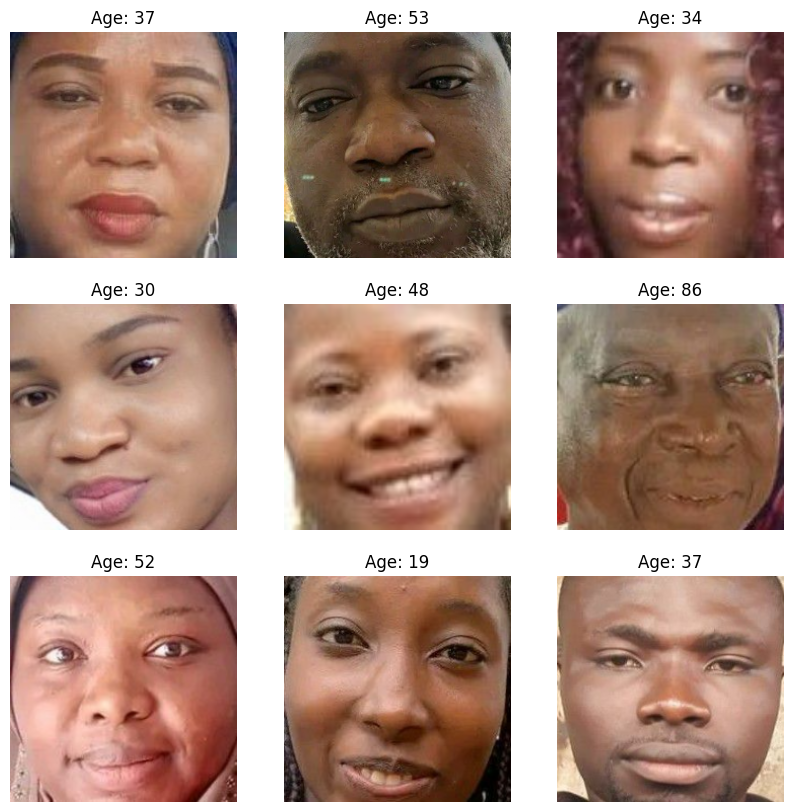

In [11]:

# Load the dataset
dataset = load_dataset(df)

# Check if the dataset is loading correctly
for images, labels in dataset.take(1):  # Take 1 batch for testing
    print(f"Image batch shape: {images.shape}")
    print(f"Labels batch: {labels}")

    # Visualize a few images from the batch (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Visualize the first 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f'Age: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()


In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
predictions = Dense(1, activation='linear')(x)  # Output layer for regression (age prediction)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])  # Mean Absolute Error (MAE) is a common metric for age prediction


In [14]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and temporary datasets (80% train, 20% temp)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Split the temporary dataset into validation and testing datasets (50% val, 50% test of the 20% temp)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Load datasets using the load_dataset function
train_dataset = load_dataset(train_df)
val_dataset = load_dataset(val_df)
test_dataset = load_dataset(test_df)


In [15]:
# Define batch size
batch_size = 32

# Calculate steps per epoch and validation steps based on the batch size
steps_per_epoch = len(train_df) // batch_size
validation_steps = len(val_df) // batch_size

# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15,  # Adjust the number of epochs as needed
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)


Epoch 1/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - loss: 272.3815 - mae: 12.8313 - val_loss: 215.0165 - val_mae: 11.6867
Epoch 2/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - loss: 221.9121 - mae: 11.7374 - val_loss: 206.2078 - val_mae: 11.4050
Epoch 3/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - loss: 214.8033 - mae: 11.5101 - val_loss: 197.7153 - val_mae: 11.1081
Epoch 4/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - loss: 211.5596 - mae: 11.3504 - val_loss: 194.2115 - val_mae: 10.9880
Epoch 5/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 73s 111ms/step - loss: 204.5532 - mae: 11.1292 - val_loss: 191.7658 - val_mae: 10.9059
Epoch 6/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - loss: 204.3078 - mae: 11.1298 - val_loss: 186.1849 - val_mae: 10.7170
Epoch 7/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - loss: 198.8451 - mae: 10.9829 - val_loss: 181.2197 - val_mae: 10.5226
Epoch 8/15
656/656 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - loss: 197.2752 - mae: 10.9402 - val_loss: 180.5250 - v

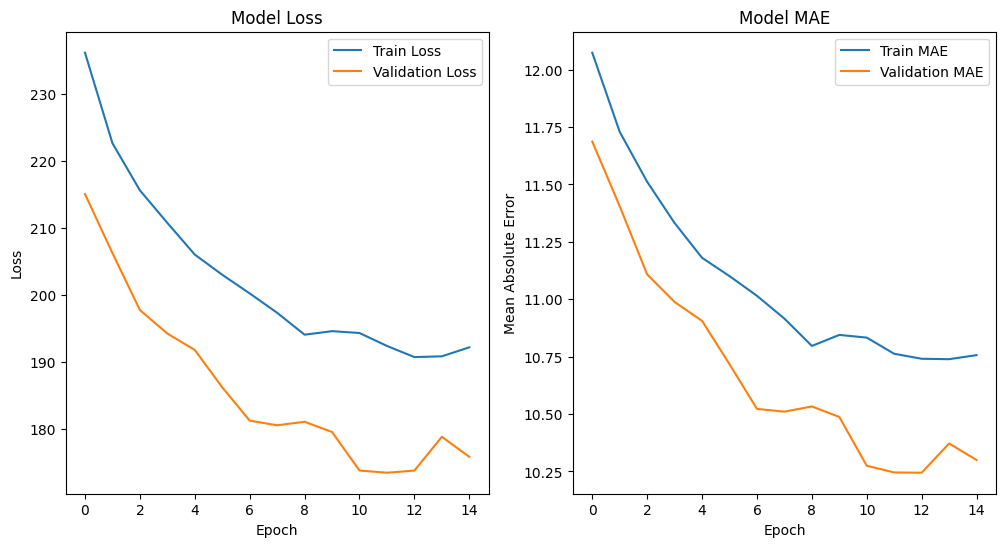

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


<ipython-input-27-bf823eee8be7>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Predicted: {int(predictions[i])}, Actual: {labels[i].numpy()}')


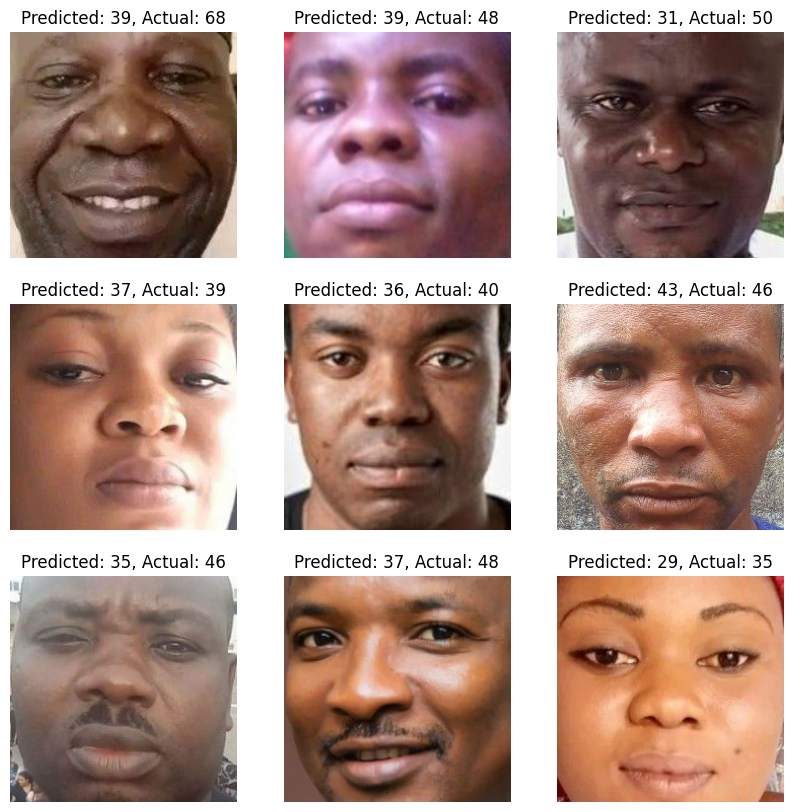

In [27]:
# Get a batch from the test dataset
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)

    # Visualize predictions vs actual ages
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show 9 images
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f'Predicted: {int(predictions[i])}, Actual: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()


In [17]:
#First save the model with this
model.save("age_restimation_model.keras")

In [18]:
# Load the saved model
model = tf.keras.models.load_model("age_restimation_model.keras")

# Convert the model to TFLite with dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save the TFLite model
with open("age_restimation_model_dynamic_quant.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp6vys5nx7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133216554636688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216554736400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216554744320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216554737104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216554732880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216554739040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216551896688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216551907072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216551896864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216551897216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133216551897392

In [20]:

import os

# Replace with the name of your TFLite model file
model_file = "age_restimation_model_dynamic_quant.tflite"  # or "age_restimation_model_dynamic_quant.tflite"

# Get the model size in bytes
model_size_bytes = os.path.getsize(model_file)

# Convert the size to megabytes (MB)
model_size_mb = model_size_bytes / (1024 * 1024)
print(f"Model size: {model_size_mb:.2f} MB")

Model size: 24.83 MB


In [21]:
from google.colab import files

# Download the TFLite model
files.download("age_restimation_model_dynamic_quant.tflite")  # or "age_restimation_model_dynamic_quant.tflite"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import tensorflow as tf

# Print the TensorFlow version
print(tf.__version__)


2.17.0
